<a href="https://colab.research.google.com/github/fujiwat/Portfolio---Python_OpenCV-Detect_Brownish_Spot_Egg/blob/main/Egg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The number of particle is : 1
Elapsed time:  90.05 msec


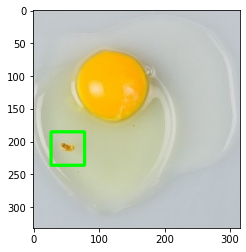

In [ ]:
import time
from cv2 import *
from numpy import array, where, ones_like, dtype, uint8
import numpy as np
import matplotlib.pyplot as plt

## Read color image and convert it to hsv color
img_cl = imread("/content/drive/MyDrive/Colab Notebooks/Egg1/marketeggs-brokenouts-figure2.jpg", 6)
startTime = time.time()
img_rgb = cvtColor(img_cl, COLOR_BGR2RGB)
img_hsv = cvtColor(img_cl, COLOR_BGR2HSV)

## define the red color area
#hsv_min = array([150,  64,   0])
#hsv_max = array([180, 255, 255])
hsv_min = array([160,  0,   0])
hsv_max = array([280, 255, 255])

## mask the red color area
mask = inRange(img_hsv, hsv_min, hsv_max)
mask = bitwise_not(mask)
img_hsv = bitwise_and(img_hsv, img_hsv, mask = mask)

## change the background color (black or something) to white color
img_hsv[:, :, 2] = where(img_hsv[:, :, 2] < 10, 255 * ones_like(img_hsv[:, :, 2]), img_hsv[:, :, 2])
#img_hsv[:, :, 2] = where(img_hsv[:, :, 2] < 189, 255 * ones_like(img_hsv[:, :, 2]), img_hsv[:, :, 2])

## convert HSV -> BGR -> Black and White
img_bgr = cvtColor(img_hsv, COLOR_HSV2BGR)
img_bw  = cvtColor(img_bgr, COLOR_BGR2GRAY)

## Brushing to remove some dust
#img_bw_b = blur(img_bw, (3, 3))
img_bw_b = blur(img_bw, (3, 3))

## remain only the dark area
#img_bw_b = where(img_bw_b < 90, 255, 0)
img_bw_b = where(img_bw_b < 115, 255, 0)

## -----------------------------------------------------------
## get the curve line of the bright color area using findContours()
## -----------------------------------------------------------
cnt_lst, hir_lst = findContours(array(img_bw_b, dtype = uint8), RETR_TREE, CHAIN_APPROX_SIMPLE)

## prints how many particle (spot) of bright area
print("The number of particle is :", len(cnt_lst))

### draw the detected particles
#for cnt in cnt_lst:
#    img_bw_b = drawContours(array(img_bw_b, dtype=uint8), [cnt], 0, 128, 5)
#plt.imshow(img_bw_b)

## draw the rectangle around the detected particles
for cnt in cnt_lst:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    #img_cl = cv2.drawContours(array(img_cl, dtype=uint8),[box],0,(0,255,0),50)
    x, y, w, h = cv2.boundingRect(cnt)
    img_cl = cv2.rectangle(array(img_cl, dtype=uint8), (x-20, y-20), (x + w+30, y + h+30), (0, 255, 0), 3)
#   img_cl = drawContours(array(img_cl, dtype=uint8),[cnt], 0, (255,0,255), 10)
#   img_bgr = cv2.drawContours(array(img_bgr, dtype=uint8),[cnt], 0, (255,0,255), 10)
#   img_bw_b = drawContours(array(img_bw_b, dtype=uint8), [cnt], 0, 128, 5)
img_rgb = cvtColor(img_cl, COLOR_BGR2RGB)
elapsedTime = time.time() - startTime
print("Elapsed time: ", "{:.2f}".format(elapsedTime*1000), "msec")
plt.imshow(img_rgb)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
